In [ ]:
#Przemek Mysliwiec
# F = 7, L = 9

from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file C:\Users\User\Documents\Data Analytics 2022 Lab\Lab2\Exercise 1\code_1.stan to exe file C:\Users\User\Documents\Data Analytics 2022 Lab\Lab2\Exercise 1\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\User\Documents\Data Analytics 2022 Lab\Lab2\Exercise 1\code_1.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/User/DOCUME~1/DATAAN~1/Lab2/EXERCI~1/code_1.hpp C:/Users/User/DOCUME~1/DATAAN~1/Lab2/EXERCI~1/code_1.stan
Warning in 'C:/Users/User/DOCUME~1/DATAAN~1/Lab2/EXERCI~1/code_1.stan', line 7, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-

In [ ]:
samples = gen_quant.sample(data={'M':7}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [ ]:
#Create a pandas dataframe from resulting draws.
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,0.0,0.0,29.17640,27.0,31.0,25.0,16.0,28.0,23.0,32.0
1,0.0,0.0,191.77600,171.0,205.0,215.0,188.0,193.0,176.0,190.0
2,0.0,0.0,9.09788,13.0,9.0,7.0,9.0,10.0,19.0,12.0
3,0.0,0.0,53.57980,65.0,46.0,53.0,58.0,59.0,52.0,65.0
4,0.0,0.0,42.48160,43.0,44.0,36.0,44.0,33.0,45.0,42.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,122.00700,110.0,132.0,106.0,131.0,140.0,113.0,119.0
996,0.0,0.0,132.23700,135.0,120.0,130.0,133.0,118.0,132.0,141.0
997,0.0,0.0,117.06800,118.0,119.0,113.0,112.0,122.0,110.0,128.0
998,0.0,0.0,202.28800,176.0,196.0,215.0,195.0,188.0,239.0,204.0


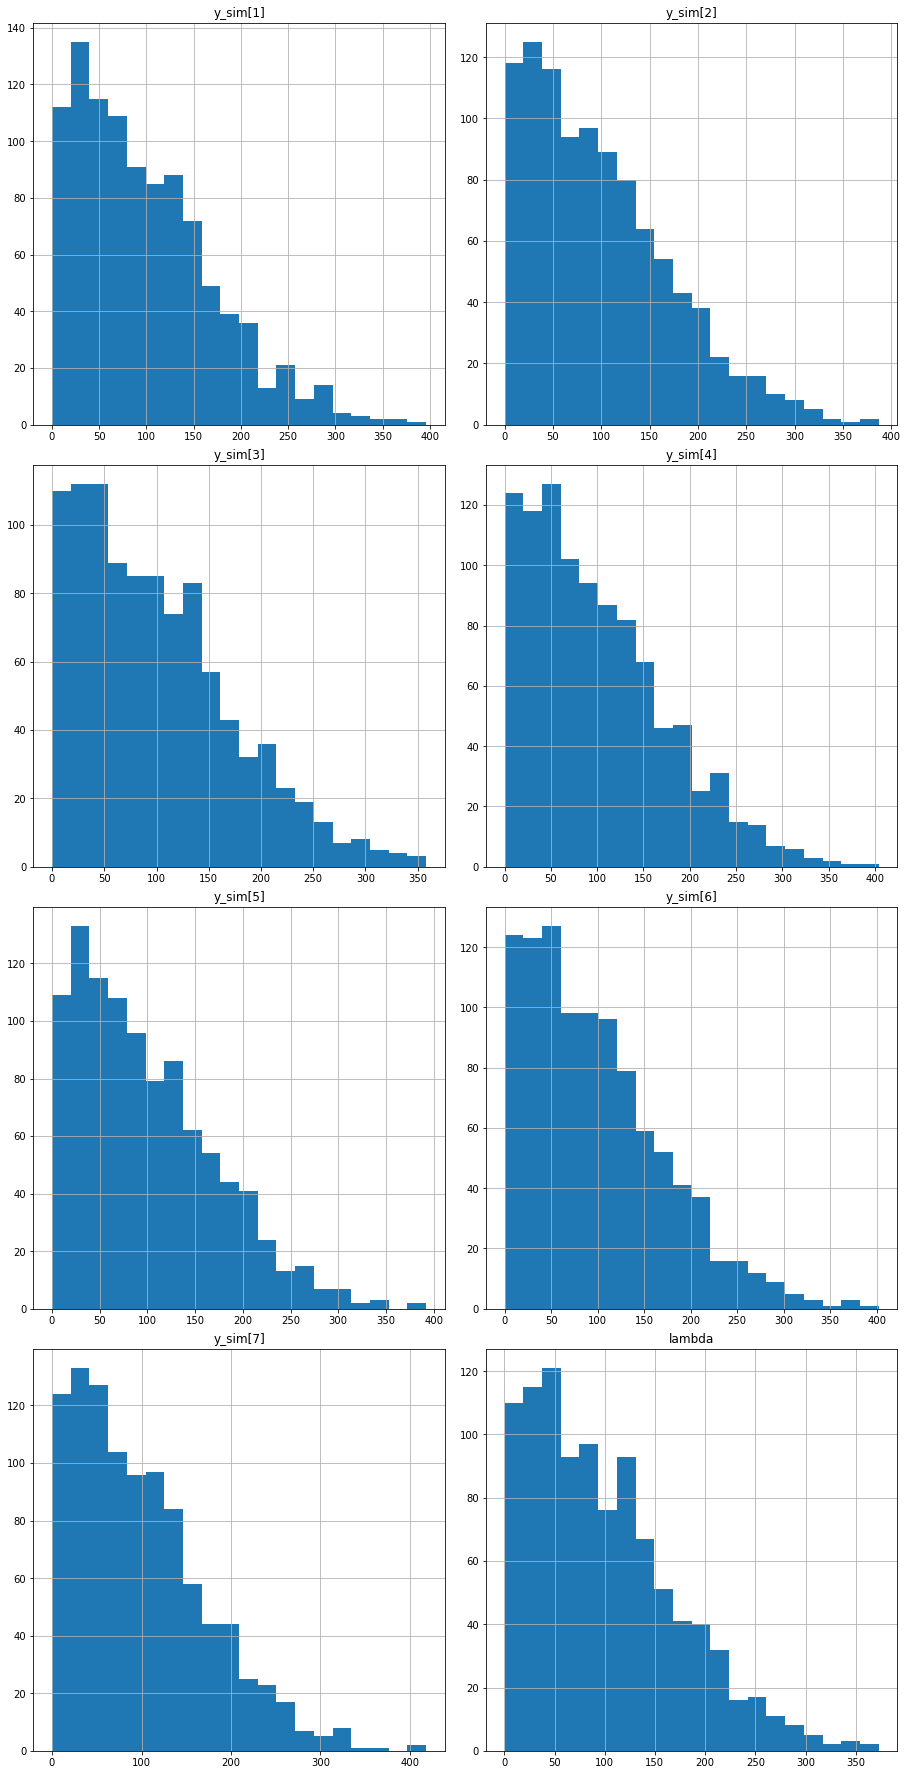

In [ ]:
#Plot a histogram for each of y_sim and lambda
f, ax = plt.subplots(4,2, figsize=(15,30))
df.hist('y_sim[1]',bins = 20, ax=ax[0][0])
df.hist('y_sim[2]',bins = 20, ax=ax[0][1])
df.hist('y_sim[3]',bins = 20, ax=ax[1][0])
df.hist('y_sim[4]',bins = 20, ax=ax[1][1])
df.hist('y_sim[5]',bins = 20, ax=ax[2][0])
df.hist('y_sim[6]',bins = 20, ax=ax[2][1])
df.hist('y_sim[7]',bins = 20, ax=ax[3][0])
df.hist('lambda', bins = 20, ax=ax[3][1])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)